C:\Users\youss\AppData\Local\Temp/ipykernel_11124/1019374296.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df.drop('outcome',1)


[0.62787904 0.32662525 0.02995065 0.00975684 0.00322117]


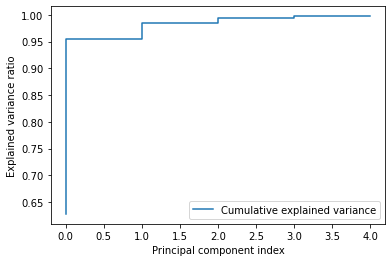

In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df=pd.read_csv('diabetics.csv') #dataframe
X=df.drop('outcome',1)
y=df['outcome']


pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
           , columns = ['A', 'B','C','D','E'])
finalDf = pd.concat([principalDf,y], axis = 1)



finalDf.to_csv("pcadata.csv",index = False , header=True)
exvar= pca.explained_variance_ratio_
cexvarsum = np.cumsum(exvar)
print(exvar)
# plt.bar(range(0,len(exvar)), exvar, label='Individual explained variance')
plt.step(range(0,len(cexvarsum)), cexvarsum ,label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='lower right')

plt.show()



In [4]:
data=pd.read_csv('pcadata.csv')
X=data.drop('outcome',1)
y=data['outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(x_train, y_train)

#prediction 
predictions = rf.predict(x_test)

#compare prediction with y_test
#confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)

#               PREDICTED
#         tn.                  fp
#ACTUAL        
#         fn                   tp

#accuracy score
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predictions)
print("accuracy ", acc)

#precision
from sklearn.metrics import precision_score
pre=precision_score(y_test,predictions)
print("precision ", pre)

#recall 
from sklearn.metrics import recall_score
rec=recall_score(y_test,predictions)
print("recall  ",rec )

#f1-measure
from sklearn.metrics import f1_score
f1=f1_score(y_test,predictions)
print("f1-measure  ",f1 )

[[128  38]
 [ 59 121]]
accuracy  0.7196531791907514
precision  0.7610062893081762
recall   0.6722222222222223
f1-measure   0.7138643067846608


/Users/na7as/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
